In [1]:
"""
Plot distribution of cleavage site usage in cleaved MPIVA datasets: DMSO, 0.5 uM JTE-607, 2.5 uM JTE-607, and 12.5 uM JTE-607
"""

import gzip
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
"""
Load PAS from L3_SVLst_merged_logratios.csv.gz
"""

L3_PAS_12p5uM = {}  # PAS -> 12p5uM_log_ratio
SVLst_PAS_12p5uM = {}  # PAS -> 12p5uM_log_ratio
with gzip.open("/JTE-607/Analysis/Figures/JTE607_CNN_25nt_6epoch_4col_model_6/Figure_3/L3_SVLst_merged_logratios.csv.gz", "rt") as f:
    f.readline()  # throw away header
    for line in f:
        var = line.split()
        if var[5] == "L3":
            L3_PAS_12p5uM[var[4]] = float(var[3])
        elif var[5] == "SVLst":
            SVLst_PAS_12p5uM[var[4]] = float(var[3])


In [3]:
"""
Load `*_polyA_pos.txt` files for cleavage site.
"""

def load_cleavage_pos_percentage(polyA_pos_file, PAS_12p5uM_dict, center=46, max_resistance=None):
    cleavage_pos_counts_dict = defaultdict(int)  # pos -> count
    total_counts = 0
    with open(polyA_pos_file, "r") as f:
        for line in f:
            var = line.split()
            if var[0] in PAS_12p5uM_dict.keys():
                if max_resistance is None:
                    curr_count = int(var[2])
                    cleavage_pos_counts_dict[int(var[1]) - center] += curr_count
                    total_counts += curr_count
                elif PAS_12p5uM_dict[var[0]] < max_resistance:
                    curr_count = int(var[2])
                    cleavage_pos_counts_dict[int(var[1]) - center] += curr_count
                    total_counts += curr_count
    for k in cleavage_pos_counts_dict.keys():
        cleavage_pos_counts_dict[k] /= total_counts
    return cleavage_pos_counts_dict


L3_DMSO_polyA_pos_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/L3_DMSO_polya_pos.txt"
L3_0p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/L3_0p5uM_polya_pos.txt"
L3_2p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/L3_2p5uM_polya_pos.txt"
L3_12p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/L3_12p5uM_polya_pos.txt"

SVLst_DMSO_polyA_pos_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/SVLst_DMSO_polya_pos.txt"
SVLst_0p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/SVLst_0p5uM_polya_pos.txt"
SVLst_2p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/SVLst_2p5uM_polya_pos.txt"
SVLst_12p5uM_polyA_pos_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/SVLst_12p5uM_polya_pos.txt"

L3_DMSO_cleavage_pos_percentage = load_cleavage_pos_percentage(L3_DMSO_polyA_pos_file, L3_PAS_12p5uM, center=46)
L3_0p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(L3_0p5uM_polyA_pos_file, L3_PAS_12p5uM, center=46)
L3_2p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(L3_2p5uM_polyA_pos_file, L3_PAS_12p5uM, center=46)
L3_12p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(L3_12p5uM_polyA_pos_file, L3_PAS_12p5uM, center=46)

SVLst_DMSO_cleavage_pos_percentage = load_cleavage_pos_percentage(SVLst_DMSO_polyA_pos_file, SVLst_PAS_12p5uM, center=46)
SVLst_0p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(SVLst_0p5uM_polyA_pos_file, SVLst_PAS_12p5uM, center=46)
SVLst_2p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(SVLst_2p5uM_polyA_pos_file, SVLst_PAS_12p5uM, center=46)
SVLst_12p5uM_cleavage_pos_percentage = load_cleavage_pos_percentage(SVLst_12p5uM_polyA_pos_file, SVLst_PAS_12p5uM, center=46)

L3_all_positions = sorted(set(list(L3_DMSO_cleavage_pos_percentage.keys()) + list(L3_0p5uM_cleavage_pos_percentage.keys()) \
                       + list(L3_2p5uM_cleavage_pos_percentage.keys()) + list(L3_12p5uM_cleavage_pos_percentage.keys())))
SVLst_all_positions = sorted(set(list(SVLst_DMSO_cleavage_pos_percentage.keys()) + list(SVLst_0p5uM_cleavage_pos_percentage.keys()) \
                       + list(SVLst_2p5uM_cleavage_pos_percentage.keys()) + list(SVLst_12p5uM_cleavage_pos_percentage.keys())))

L3_cleavage_pos_percentage_dict = {k: [L3_DMSO_cleavage_pos_percentage[k], L3_0p5uM_cleavage_pos_percentage[k], \
                                   L3_2p5uM_cleavage_pos_percentage[k], L3_12p5uM_cleavage_pos_percentage[k]] \
     for k in sorted(L3_all_positions)}
SVLst_cleavage_pos_percentage_dict = {k: [SVLst_DMSO_cleavage_pos_percentage[k], SVLst_0p5uM_cleavage_pos_percentage[k], \
                                   SVLst_2p5uM_cleavage_pos_percentage[k], SVLst_12p5uM_cleavage_pos_percentage[k]] \
     for k in sorted(SVLst_all_positions)}

all_cleavage_pos_percentage_dict = {k: [(L3_DMSO_cleavage_pos_percentage[k] + SVLst_DMSO_cleavage_pos_percentage[k])/2, \
                                        (L3_0p5uM_cleavage_pos_percentage[k] + SVLst_0p5uM_cleavage_pos_percentage[k])/2, \
                                   (L3_2p5uM_cleavage_pos_percentage[k] + SVLst_2p5uM_cleavage_pos_percentage[k])/2, \
                                        (L3_12p5uM_cleavage_pos_percentage[k] + SVLst_12p5uM_cleavage_pos_percentage[k])/2] \
     for k in sorted(L3_all_positions + SVLst_all_positions)}


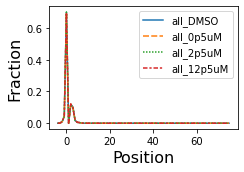

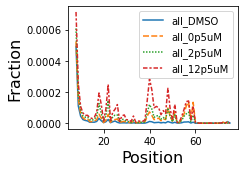

<Figure size 252x180 with 0 Axes>

In [4]:
"""
Plot from dataframe
"""
figures_dir = "/JTE-607/Analysis/Figures/Revisions_1/"
plt.rcParams["figure.figsize"] = (3.5,2.5)

all_cleavage_pos_df = pd.DataFrame.from_dict(all_cleavage_pos_percentage_dict, orient="index", columns=["all_DMSO", "all_0p5uM", "all_2p5uM", "all_12p5uM"])
all_cleavage_pos_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/all_cleavage_pos_df.tsv', sep="\t", index=True)

sns.lineplot(data=all_cleavage_pos_df)
plt.xlabel("Position", fontsize=16)
plt.ylabel("Fraction", fontsize=16)
plt.tight_layout()
plt.savefig(figures_dir + "all_cleavage_pos_percentage.pdf")
plt.show()
plt.clf()

all_cleavage_pos_percentage_dict = {k: [L3_DMSO_cleavage_pos_percentage[k] + SVLst_DMSO_cleavage_pos_percentage[k], \
                                        L3_0p5uM_cleavage_pos_percentage[k] + SVLst_0p5uM_cleavage_pos_percentage[k], \
                                   L3_2p5uM_cleavage_pos_percentage[k] + SVLst_2p5uM_cleavage_pos_percentage[k], \
                                        L3_12p5uM_cleavage_pos_percentage[k] + SVLst_12p5uM_cleavage_pos_percentage[k]] \
     for k in sorted(L3_all_positions + SVLst_all_positions) if k > 7}

all_cleavage_pos_df = pd.DataFrame.from_dict(all_cleavage_pos_percentage_dict, orient="index", columns=["all_DMSO", "all_0p5uM", "all_2p5uM", "all_12p5uM"])
all_cleavage_pos_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/all_cleavage_pos_df_longer7nt.tsv', sep="\t", index=True)

sns.lineplot(data=all_cleavage_pos_df)
plt.xlabel("Position", fontsize=16)
plt.ylabel("Fraction", fontsize=16)
plt.tight_layout()
plt.savefig(figures_dir + "all_cleavage_pos_percentage_right_tail.pdf")
plt.show()
plt.clf()